# **Exercise: Building a Fully Connected Network (FCN) for Devnagari Digit Classification.**

## **Task 1: Data Preparation**
### **Loading the data**

In [1]:
!pip install tensorflow keras


In [2]:
import tensorflow as tf
print (tf.keras.__version__)

3.8.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Download the provided folder that contains the Devnagari digits dataset.**





### **Task 2: Build the FCN Model**

**Model Architecture**

Checking directories...
Train dir exists: True
Test dir exists: True

Loading training set...
Found 10 classes in /content/drive/My Drive/DevanagariHandwrittenDigitDataset/Train/: ['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']
Loading class: digit_0 (label: 0)
Loading class: digit_1 (label: 1)
Loading class: digit_2 (label: 2)
Loading class: digit_3 (label: 3)
Loading class: digit_4 (label: 4)
Loading class: digit_5 (label: 5)
Loading class: digit_6 (label: 6)
Loading class: digit_7 (label: 7)
Loading class: digit_8 (label: 8)
Loading class: digit_9 (label: 9)

Loading test set...
Found 10 classes in /content/drive/My Drive/DevanagariHandwrittenDigitDataset/Test/: ['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']
Loading class: digit_0 (label: 0)
Loading class: digit_1 (label: 1)
Loading class: digit_2 (label: 2)
Loading class: digit_3 (label: 3)
Loading class: d

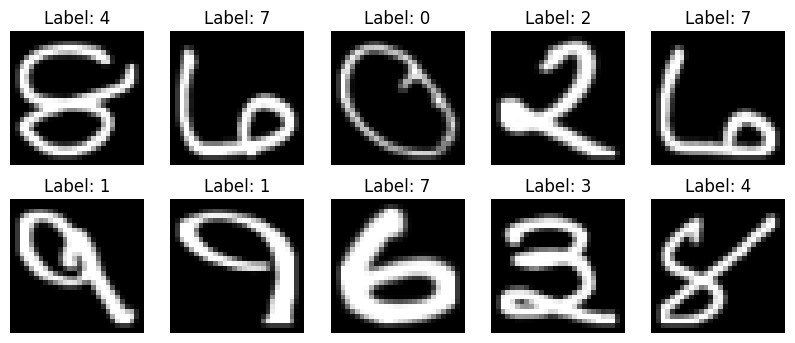

In [36]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from PIL import Image

# Define dataset paths (CHECK THESE PATHS IN GOOGLE DRIVE!)
train_dir = "/content/drive/My Drive/DevanagariHandwrittenDigitDataset/Train/"
test_dir = "/content/drive/My Drive/DevanagariHandwrittenDigitDataset/Test/"

# Verify directories exist
print("Checking directories...")
print(f"Train dir exists: {os.path.exists(train_dir)}")
print(f"Test dir exists: {os.path.exists(test_dir)}")

if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Train directory not found: {train_dir}")

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels
def load_images_from_folder(folder):
    images = []
    labels = []

    if not os.path.exists(folder):
        print(f" Warning: Directory not found: {folder}")
        return np.array([]), np.array([])  # Return empty arrays instead of crashing

    class_names = sorted(os.listdir(folder))
    print(f"Found {len(class_names)} classes in {folder}: {class_names}")

    # Map class names to digits 0-9
    class_map = {f"digit_{i}": i for i in range(10)}

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)

        if class_name in class_map:
            label = class_map[class_name]
            print(f"Loading class: {class_name} (label: {label})")

            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)

                try:
                    img = Image.open(img_path).convert("L")
                    img = img.resize((img_width, img_height))
                    img = np.array(img) / 255.0
                    images.append(img)
                    labels.append(label)
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")

    if len(images) == 0:
        print(f" No valid images found in {folder}")
        return np.array([]), np.array([])

    return np.array(images), np.array(labels)

# Load datasets
print("\nLoading training set...")
x_train, y_train = load_images_from_folder(train_dir)

print("\nLoading test set...")
x_test, y_test = load_images_from_folder(test_dir)

# If test set is empty, split 20% of training data as test set
if len(x_test) == 0:
    print("\nTest set is empty! Splitting 20% of training data as test set...")
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Reshape images
if len(x_train) > 0:
    x_train = x_train.reshape(-1, img_height, img_width, 1)
if len(x_test) > 0:
    x_test = x_test.reshape(-1, img_height, img_width, 1)

# Fixed number of classes (Devanagari digits 0-9)
num_classes = 10

# One-hot encode labels
if len(y_train) > 0:
    y_train = to_categorical(y_train, num_classes=num_classes)
if len(y_test) > 0:
    y_test = to_categorical(y_test, num_classes=num_classes)

# Print dataset info
print("\nDataset Summary:")
print(f"Training set: {x_train.shape if len(x_train) > 0 else 'Empty'}, Labels: {y_train.shape if len(y_train) > 0 else 'Empty'}")
print(f"Testing set: {x_test.shape if len(x_test) > 0 else 'Empty'}, Labels: {y_test.shape if len(y_test) > 0 else 'Empty'}")

# Visualize training images
if len(x_train) > 0:
    plt.figure(figsize=(10, 4))
    for i in range(min(10, len(x_train))):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
        plt.title(f"Label: {np.argmax(y_train[i])}" if len(y_train) > 0 else "No label")
        plt.axis("off")
    plt.show()
else:
    print(" No training images to display!")

In [37]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
[
keras.layers.Input(shape=input_shape),
keras.layers.Flatten(),
keras.layers.Dense(64, activation="sigmoid"),
keras.layers.Dense(128, activation="sigmoid"),
keras.layers.Dense(256, activation="sigmoid"),
keras.layers.Dense(num_classes, activation="softmax"),
]
)
summary = model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

### **Task 3: Compile the Model**



In [38]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### **Task 4: Train the Model**



In [39]:
batch_size = 128
epochs = 20
# Callbacks
callbacks = [
keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]
# Train the model with callbacks and validation split
history = model.fit(
x_train,
y_train,
batch_size=batch_size,
epochs=epochs,
validation_split=0.2,
callbacks=callbacks,
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2017 - loss: 1.9777 - val_accuracy: 0.4933 - val_loss: 1.4882
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6727 - loss: 1.2566 - val_accuracy: 0.7971 - val_loss: 0.6308
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8365 - loss: 0.5150 - val_accuracy: 0.8985 - val_loss: 0.3416
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9116 - loss: 0.3016 - val_accuracy: 0.9279 - val_loss: 0.2364
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9454 - loss: 0.2030 - val_accuracy: 0.9464 - val_loss: 0.1731
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9623 - loss: 0.1418 - val_accuracy: 0.9534 - val_loss: 0.1520
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9703 - loss: 0.1086 - val_accuracy: 0.9617 - val_loss: 0.1356
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9795 - loss: 0.0872 - val_accuracy: 0.9560 - va

### **Task 5: Evaluate the Model**



In [41]:
test_loss, test_acc = model.evaluate(x_test if len(x_test) > 0 else x_train[:1], y_test if len(y_test) > 0 else y_train[:1], verbose=2)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

62/62 - 0s - 3ms/step - accuracy: 0.9760 - loss: 0.0989
Test Loss: 0.0989
Test accuracy: 0.9760


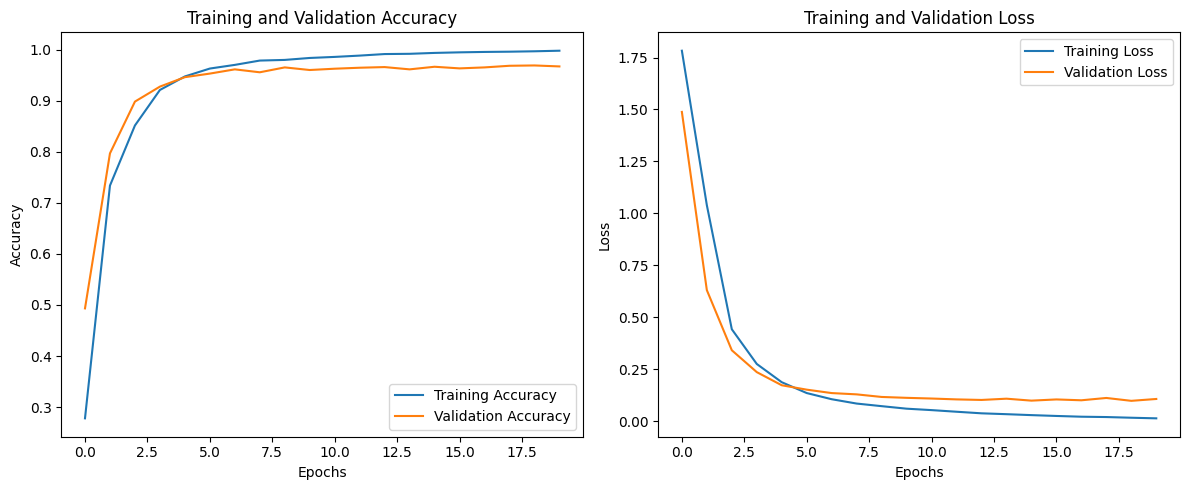

In [42]:
# Plot training history if available
if history and hasattr(history, 'history'):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    if 'accuracy' in history.history:
        plt.plot(history.history['accuracy'], label='Training Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    if 'loss' in history.history:
        plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("No training history available to plot")

### **Task 5: Evaluate the Model**



In [43]:
# Save the trained model to an .h5 file
model.save('/content/drive/My Drive/devnagari_model.h5')

print("Model saved to devnagari_digit_model.h5")


Model saved to devnagari_digit_model.h5


In [44]:
from google.colab import drive
drive.mount('/content/drive')

# Specify the correct path where your model is saved
model_path = '/content/drive/MyDrive/path_to_your_model/devnagari_digit_model.h5'

try:
    loaded_model = tf.keras.models.load_model(model_path)
    test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test, verbose=1)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
except FileNotFoundError:
    print(f"Model not found at: {model_path}")
    print("Please verify the file path.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model not found at: /content/drive/MyDrive/path_to_your_model/devnagari_digit_model.h5
Please verify the file path.


### **Task 5: Predictions**


In [45]:
# Predict on test data
predictions = model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Predicted label for first image: 3
True label for first image: 3


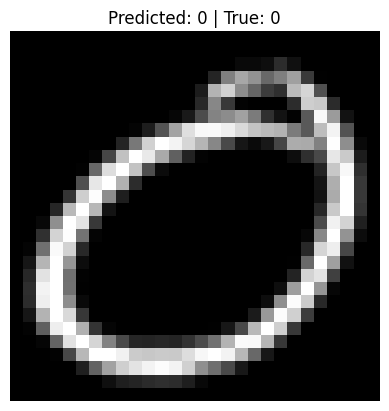

In [ ]:
import matplotlib.pyplot as plt

# Visualize the first image and its prediction
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_labels[0]} | True: {np.argmax(y_test[0])}")
plt.axis("off")
plt.show()
